In [6]:
import mlrose_hiive
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV, learning_curve, validation_curve, cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, mean_squared_error,ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import svm
import time
!pip install six
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

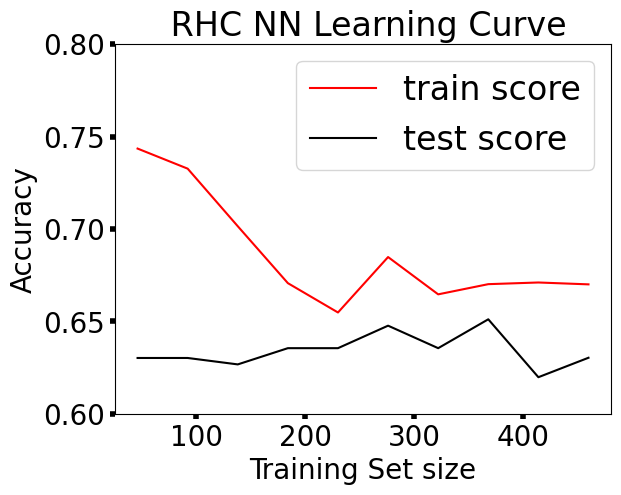

Cross Validation Score0.6510482981071216


In [12]:
from sklearn.model_selection import learning_curve, validation_curve
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv", sep=",", header=0, index_col=False)

df.dropna(inplace=True)
X=df.drop(columns=['Outcome'])
y=df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)
rhc=mlrose_hiive.NeuralNetwork(hidden_nodes=[4,], activation='tanh', algorithm='random_hill_climb', early_stopping=True, max_attempts=100, max_iters=700, bias=True, learning_rate=0.7, curve=True, random_state=42) 
rhc.fit(x_train, y_train)
y_prediction=rhc.predict(x_test)
rhc_fitness=rhc.fitness_curve[:,0]
train_sizes=np.linspace(0.1,1,10)
train_sizes, train_score, valid_score, fit_times,_=learning_curve(rhc, x_train, y_train, train_sizes=train_sizes, n_jobs=-1, return_times=True, scoring='accuracy', cv=5)
train_score_mean=np.mean(train_score, axis=1)
rhc_test_score_mean=np.mean(valid_score, axis=1)
plt.figure()
plt.plot( train_sizes,train_score_mean, label="train score", color="red")
plt.plot( train_sizes,rhc_test_score_mean, label="test score", color="black")
plt.legend(fontsize=24)
plt.title(" RHC NN Learning Curve",fontsize=24)
plt.xlabel("Training Set size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.ylim(0.6,0.8)
plt.show()
cross_validation_score=cross_val_score(rhc, X,y, cv=5).mean()
print(f'Cross Validation Score{cross_validation_score}')



Simulated Annealing

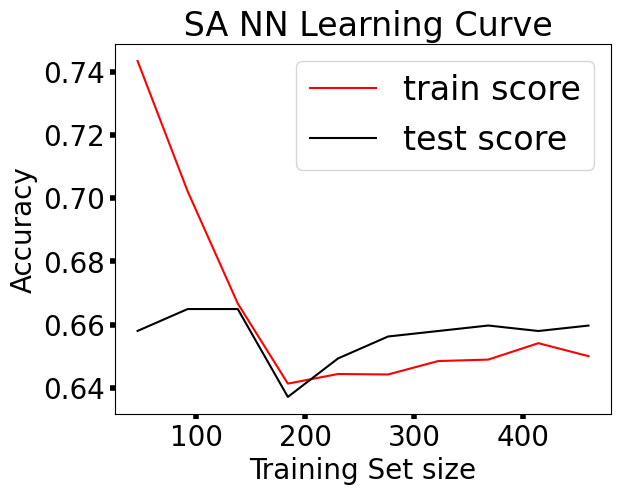

Cross Validation Score0.6497495968084203


In [13]:
from mlrose_hiive.algorithms.decay import GeomDecay
sa = mlrose_hiive.NeuralNetwork( hidden_nodes=[5,2], activation='relu',
                           algorithm = 'simulated_annealing',early_stopping = True,
                           max_attempts = 100, max_iters = 100,
                            learning_rate = .3,
                            curve = True, random_state=42, 
                           schedule = GeomDecay(init_temp=10, decay=0.1, min_temp=0.001) )
sa.fit(x_train, y_train)
y_prediction=sa.predict(x_test)
sa_fitness=sa.fitness_curve[:,0]
train_sizes=np.linspace(0.1,1,10)
train_sizes, train_score, valid_score=learning_curve(sa, x_train, y_train, train_sizes=train_sizes, n_jobs=-1,  scoring='accuracy', cv=5)
train_score_mean=np.mean(train_score, axis=1)
sa_test_score_mean=np.mean(valid_score, axis=1)
plt.figure()
plt.plot( train_sizes,train_score_mean, label="train score", color="red")
plt.plot( train_sizes,sa_test_score_mean, label="test score", color="black")
plt.legend(fontsize=24)
plt.title(" SA NN Learning Curve",fontsize=24)
plt.xlabel("Training Set size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()
cross_validation_score=cross_val_score(sa, X,y, cv=5).mean()
print(f'Cross Validation Score{cross_validation_score}')


Genetic Algorithm

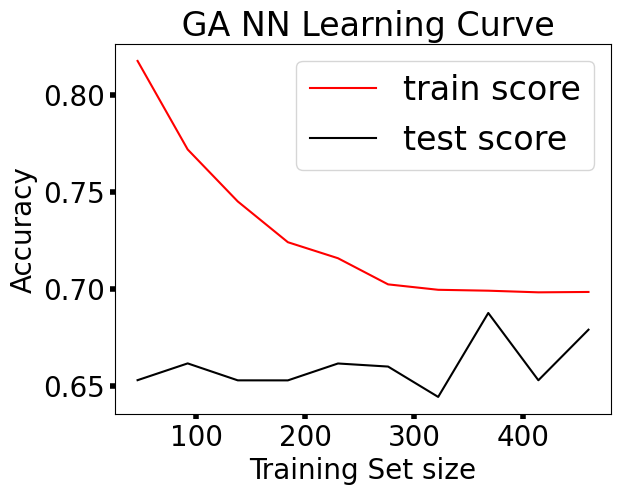

Cross Validation Score0.6718784483490368


In [14]:
ga=mlrose_hiive.NeuralNetwork(hidden_nodes=[5,2], activation="identity", algorithm='genetic_alg', early_stopping=True, max_attempts=100, max_iters=100, bias=True, learning_rate=0.1, curve=True, random_state=42, pop_size=250, mutation_prob=0.6)
ga.fit(x_train, y_train)
y_prediction=ga.predict(x_test)
ga_fitness=ga.fitness_curve[:,0]
train_sizes=np.linspace(0.1,1,10)
train_sizes, train_score, valid_score, fit_times,_=learning_curve(ga, x_train, y_train, train_sizes=train_sizes, n_jobs=4, return_times=True, scoring='accuracy', cv=5)
train_score_mean=np.mean(train_score, axis=1)
ga_test_score_mean=np.mean(valid_score, axis=1)
plt.figure()
plt.plot( train_sizes,train_score_mean, label="train score", color="red")
plt.plot( train_sizes,ga_test_score_mean, label="test score", color="black")
plt.legend(fontsize=24)
plt.title(" GA NN Learning Curve",fontsize=24)
plt.xlabel("Training Set size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()
cross_validation_score=cross_val_score(ga, X,y, cv=5).mean()
print(f'Cross Validation Score{cross_validation_score}')

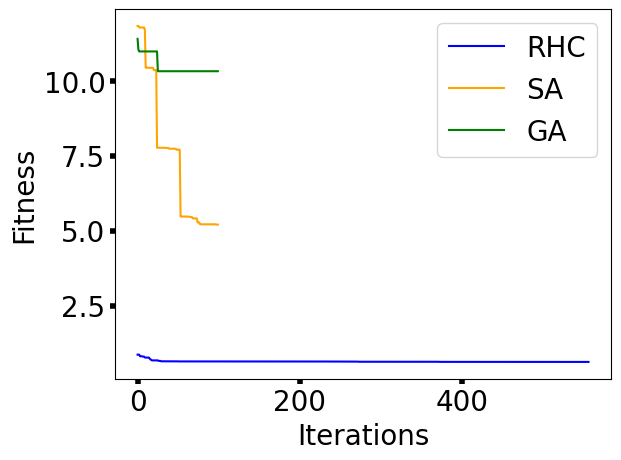

In [16]:
plt.plot(rhc_fitness,label="RHC", color="blue")
plt.plot(sa_fitness,label="SA", color="orange")
plt.plot(ga_fitness, label="GA", color="green")
plt.xlabel("Iterations",fontsize=20)
plt.ylabel("Fitness",fontsize=20)
plt.legend(fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()

<Figure size 640x480 with 0 Axes>

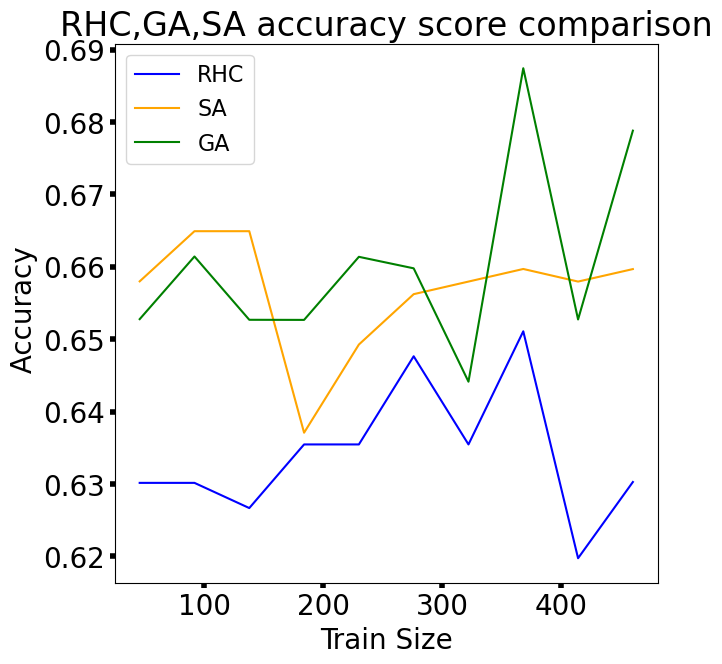

In [17]:
plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes,rhc_test_score_mean,label="RHC",color="blue")
plt.plot(train_sizes,sa_test_score_mean,label="SA",color="orange")
plt.plot(train_sizes,ga_test_score_mean,label="GA",color="green")
plt.title("RHC,GA,SA accuracy score comparison",fontsize=24)
plt.xlabel("Train Size",fontsize=20)
plt.ylabel(" Accuracy",fontsize=20)
plt.legend(loc="best", fontsize=16)
plt.tick_params(labelsize=20,width=4)
plt.show()